In [10]:
import numpy as np
import pandas as pd

In [67]:
df=pd.read_csv("data.csv");
df.head()

,Sentence,Sentiment,id
0,The GeoSolutions technology will leverage Bene...,positive,1
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,2
2,"For the last quarter of 2010 , Componenta 's n...",positive,3
3,According to the Finnish-Russian Chamber of Co...,neutral,4
4,The Swedish buyout firm has sold its remaining...,neutral,5


In [12]:
df.info

<bound method DataFrame.info of                                                Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]>

In [13]:

df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [14]:
df["Sentiment"].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline


([<matplotlib.patches.Wedge at 0x1f31b823dc0>,
 [Text(-0.12337086844980569, 1.0930597553738501, 'neutral'),
  Text(-0.3772718908636739, -1.0332792073607928, 'positive'),
  Text(0.9844468698301111, -0.4907793399091863, 'negative')])

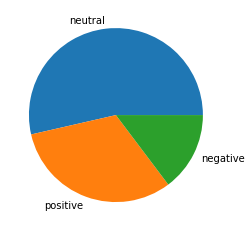

In [16]:
plt.pie(df["Sentiment"].value_counts(),labels=['neutral','positive','negative'])

In [17]:
plt.style.use('ggplot')

In [18]:
import nltk

<AxesSubplot:title={'center':'reviews'}>

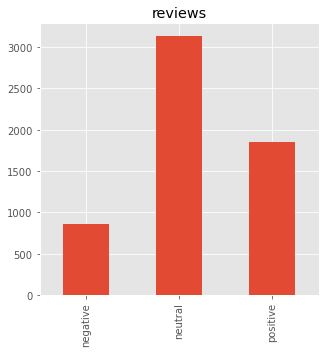

In [19]:
plt.style.use('ggplot')
df['Sentiment'].value_counts().sort_index().plot(kind='bar',title="reviews",figsize=(5,5))

In [20]:
eg=df['Sentence'][20]
eg

'Two of these contracts are for turntable anode vibrocompactors that will be delivered to Gansu Hualu Aluminum Co Ltd and another unnamed costumer .'

In [21]:
df=df.head(500)


vader(valence aware dictionary and sentiment resoner)

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [23]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
a = SentimentIntensityAnalyzer()

In [25]:
a.polarity_scores("i am happy!")

{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound': 0.6114}

In [26]:
a.polarity_scores("fuck off bitch")

{'neg': 0.88, 'neu': 0.12, 'pos': 0.0, 'compound': -0.8074}

In [27]:
eg

'Two of these contracts are for turntable anode vibrocompactors that will be delivered to Gansu Hualu Aluminum Co Ltd and another unnamed costumer .'

In [30]:
a.polarity_scores(eg)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [31]:
# run the polarity score on dataset

In [55]:
df.shape

(500, 1)

In [68]:
df.head()

,Sentence,Sentiment,id
0,The GeoSolutions technology will leverage Bene...,positive,1
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,2
2,"For the last quarter of 2010 , Componenta 's n...",positive,3
3,According to the Finnish-Russian Chamber of Co...,neutral,4
4,The Swedish buyout firm has sold its remaining...,neutral,5


In [95]:
polarity = [round(a.polarity_scores(i)['compound'], 2) for i in df['Sentence']]
df['sentiment_score'] = polarity

In [93]:
df.head()

,Sentence,sentiment_score
0,The GeoSolutions technology will leverage Bene...,0.54
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",-0.20
2,"For the last quarter of 2010 , Componenta 's n...",0.15
3,According to the Finnish-Russian Chamber of Co...,0.00
4,The Swedish buyout firm has sold its remaining...,0.00
